In [21]:
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [22]:
#  生成一个随机半正定对称矩阵 A
n = 5
B = np.random.randint(0,1000,(n,1))
A = B @ B.T
x0 = np.random.randint(0,100, (n,1))
print(x0)
print(A)

[[62]
 [69]
 [48]
 [84]
 [ 6]]
[[199809 212325 333909  33525 265518]
 [212325 225625 354825  35625 282150]
 [333909 354825 558009  56025 443718]
 [ 33525  35625  56025   5625  44550]
 [265518 282150 443718  44550 352836]]


In [23]:
# 求解特征值和特征向量
A_lambda = np.linalg.eig(A)

#求解特征值即特征向量
A_lambda = np.linalg.eig(A)


index = np.argmax(A_lambda[0])
A_lambda_max = np.real(A_lambda[0][index])
u1 = np.transpose([A_lambda[1][:,index]])


print('A 最大特征值为：{0}\n对应的特征向量：\n{1}'.format(A_lambda_max, u1))

A 最大特征值为：1341903.9999999995
对应的特征向量：
[[-0.38587514]
 [-0.41004629]
 [-0.64485174]
 [-0.06474415]
 [-0.51277368]]


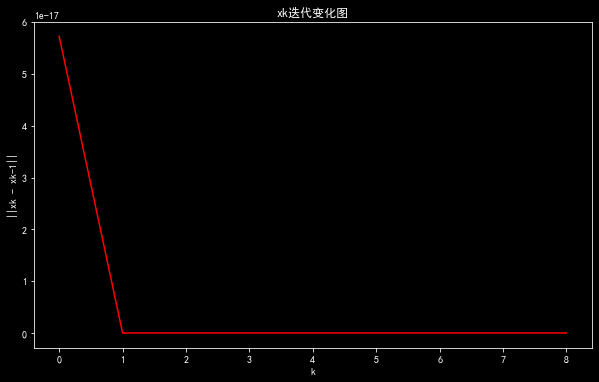

xk最终收敛的值:
 [[0.38587514]
 [0.41004629]
 [0.64485174]
 [0.06474415]
 [0.51277368]]


In [24]:
k = int(input('请输入迭代次数:'))

xk = x0

x_list = []
xu_list = []


flag = 0
if u1[0][0] > 0:
    u11 = 0 - u1
    flag = 1
else:
    u11 = u1

for i in range(k):
    y = A @ xk
    xm = xk
    xk = (1/np.linalg.norm(y)) * y
    if i > 0:
        x_list.append(np.linalg.norm(xk - xm))
        xu_list.append(np.linalg.norm(xk + u11))


# 显示xk变化范数的图像来验证xk的收敛性
plt.figure(figsize=(10,6))
plt.plot(range(len(x_list)),x_list,'r')
plt.title('xk迭代变化图')
plt.xlabel('k')
plt.ylabel('||xk - xk-1||')
plt.show()
print('xk最终收敛的值:\n', xk)

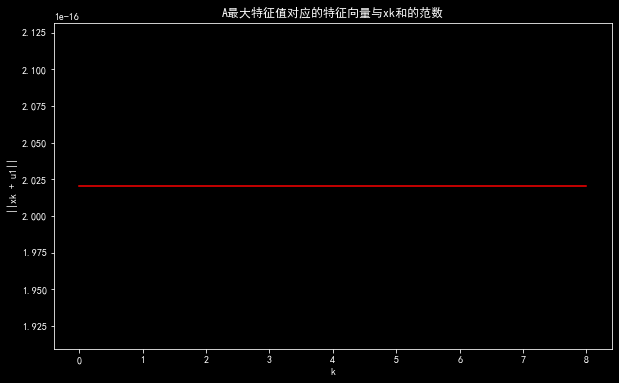

xk与u1互为相反数!


In [25]:
# 可以大致看出xk与u1要么是相同要么是相反,下面作出图像分析
# 即 xk = u1 && xk = -u1
plt.figure(figsize=(10,6))
plt.plot(range(len(xu_list)),xu_list,'r')
plt.title('A最大特征值对应的特征向量与xk和的范数')
plt.xlabel('k')
plt.ylabel('||xk + u1||')
plt.show()

if flag == 0:
    print('xk = - ui')
else:
    print('xk = ui')

**从最终结果，可以看出xk与u1,要么是xk = u1, 要么 xk = - u1, 当然xk的值总是正的，而A最大特征值对应的特征向量可能全为负。**